In [2]:
%matplotlib inline

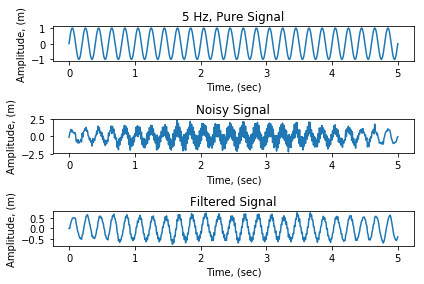

In [3]:
import numpy as np
import matplotlib.pyplot as plt

f1 = 5 # Hertz
w1 = 2*np.pi*f1 # angular frequency
f2 = 50 # Hertz
w2 = 2*np.pi*f2 # angular frequency

# Create an array of time points
N = 500
t = np.linspace(0,5,N)

# Create signals
pure = np.sin(w1*t) # pure sine wave
noise = np.sin(w2*t) + np.random.normal(0, 0.2, N) # Normally distributed random noise
 # 0   = mean of the normal distribution
 # 0.2 = standard deviation of the normal distribution
 # N   = number of elements in the array
signal = pure + noise # noisy sine wave

# Recursive low-pass filter
alpha = 0.2 # alpha closer to zero means stronger smoothing effect
filtered = np.zeros(N) # initialize array to store values
for i in range(N):
    if i > 1:
        filtered[i] = filtered[i-1] + alpha*(signal[i] - filtered[i-1])


fig = plt.figure()
ax1 = fig.add_subplot(311)
ax1.plot(t, pure)
ax1.set_xlabel('Time, (sec)')
ax1.set_ylabel('Amplitude, (m)')
ax1.set_title('5 Hz, Pure Signal')

ax2 = fig.add_subplot(312)
ax2.plot(t, signal)
ax2.set_xlabel('Time, (sec)')
ax2.set_ylabel('Amplitude, (m)')
ax2.set_title('Noisy Signal')

ax3 = fig.add_subplot(313)
ax3.plot(t, filtered)
ax3.set_xlabel('Time, (sec)')
ax3.set_ylabel('Amplitude, (m)')
ax3.set_title('Filtered Signal')

plt.tight_layout()
plt.show()